# **Importing Libraries**







In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

# **Loading Dataset**



In [ ]:
# loading dataframe using pandas

data = pd.read_csv("details.csv")


In [ ]:
data.head()

,sensorId,floor,building,timezoneOffset,name,posX,posY,height,width,workspace,capacity,department
0,648865e6f4f2916cab12bef2,Floor 4,REM Tower1,19800000,Desk 11,948.0,200.0,15,15,Desks,1,BMS
1,648865e6f4f2916cab12bef3,Floor 4,REM Tower2,19800000,Desk 12,1010.0,199.0,15,15,Desks,1,BMS
2,648865e6f4f2916cab12bef4,Floor 4,REM Tower3,19800000,Desk 13,977.0,199.0,15,15,Desks,1,BMS
3,648865e6f4f2916cab12bef5,Floor 4,REM Tower4,19800000,Desk 14,1007.0,158.0,15,15,Desks,1,BMS
4,648865e6f4f2916cab12bef6,Floor 4,REM Tower5,19800000,Desk 15,976.0,275.0,15,15,Desks,1,BMS


# **EDA**







In [ ]:
# getting basic information from the detials.csv file
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sensorId        154 non-null    object 
 1   floor           154 non-null    object 
 2   building        154 non-null    object 
 3   timezoneOffset  154 non-null    int64  
 4   name            154 non-null    object 
 5   posX            154 non-null    float64
 6   posY            154 non-null    float64
 7   height          154 non-null    int64  
 8   width           154 non-null    int64  
 9   workspace       154 non-null    object 
 10  capacity        154 non-null    int64  
 11  department      154 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 14.6+ KB


The dataset comprises 154 entries and 12 columns, each serving a specific purpose. These columns are as follows:

1. `sensorId`: This column represents the categorical ID assigned to each sensor.

2. `floor`: This column denotes the categorical variable indicating the floor on which the sensor is positioned.

3. `building`: This column signifies the categorical variable specifying the building names where the sensor is situated.

4. `timezoneOffset`: This numerical column indicates the timezone offset applicable to the sensor's location.

5. `name`: This column contains the categorical variable denoting the name assigned to the sensor location.

6. `posX`: This numerical column represents the X-coordinate of the sensor's position.

7. `posY`: This numerical column represents the Y-coordinate of the sensor's position.

8. `height`: This numerical column indicates the height of the sensor.

9. `width`: This numerical column specifies the width of the sensor.

10. `workspace`: This column represents the categorical variable denoting the workspace where the sensor is located.

11. `capacity`: This numerical column signifies the capacity of the sensor.

12. `department`: This column contains the categorical variable indicating the department to which the sensor belongs.


In [ ]:
# Generate summary statistics for the numerical columns
data.describe()


,timezoneOffset,posX,posY,height,width,capacity
count,154.0,154.000000,154.000000,154.0,154.0,154.0
mean,19800000.0,686.324675,336.801299,15.0,15.0,1.0
std,0.0,271.331428,189.912395,0.0,0.0,0.0
min,19800000.0,225.000000,91.000000,15.0,15.0,1.0
25%,19800000.0,467.500000,189.000000,15.0,15.0,1.0
50%,19800000.0,633.000000,266.500000,15.0,15.0,1.0
75%,19800000.0,943.750000,434.000000,15.0,15.0,1.0
max,19800000.0,1227.000000,843.000000,15.0,15.0,1.0



Here are the summary statistics for the numerical columns:

1. `timezoneOffset`: All values are the same (19800000), indicating a lack of variability and useful information in this column.

2. `posX`: The average X-coordinate is approximately 686.32. The values range from 225 to 1227, with a standard deviation of about 271.33. This suggests a significant amount of variability in the X-coordinates of the sensors.

3. `posY`: The average Y-coordinate is approximately 336.80. The values range from 91 to 843, with a standard deviation of about 189.91. This indicates a fair amount of variability in the Y-coordinates of the sensors.

4. `height`: All values are the same (15), indicating a lack of variability.

5. `width`: All values are the same (15), indicating a lack of variability.

6. `capacity`: All values are the same (1), indicating a lack of variability.







In [ ]:
# Generate summary statistics for the categorical columns
data.describe(include=['O'])


,sensorId,floor,building,name,workspace,department
count,154,154,154,154,154,154
unique,154,2,154,154,1,7
top,648865e6f4f2916cab12bef2,Floor 4,REM Tower1,Desk 11,Desks,SBT
freq,1,87,1,1,154,35


Here are the summary statistics for the categorical columns:

1. `sensorId`: This column serves as a unique identifier for each sensor. There are 154 unique sensor IDs, and each ID appears only once, which aligns with expectations.

2. `floor`: The 'floor' column exhibits two unique values, with 'Floor 4' being the most frequent value.

3. `building`: It seems that each sensor is positioned in a different building, as there are 154 unique building names, with each name appearing only once.

4. `name`: Each sensor has a distinct name, resulting in 154 unique names, with each name occurring once.

5. `workspace`: All sensors are located in the 'Desks' workspace, indicating a consistent location for all sensors.

6. `department`: The 'department' column consists of 7 unique departments, with 'SBT' being the most frequently occurring department.

#**Visualize Data Distribution and Relationships**








To gain a better understanding of the distribution of values in each column and explore the relationships between different columns, we'll create histograms for the numerical columns and bar plots for the categorical columns. However, we will exclude certain columns from the visualization as follows:

For the numerical columns, we'll skip `timezoneOffset`, `height`, `width`, and `capacity` since they don't have any variability.

For the categorical columns, we'll skip `sensorId`, `name`, and `workspace` since they each have a large number of unique values or only one unique value.

By focusing on the remaining columns, we can generate meaningful visualizations that highlight the patterns and insights within the dataset.



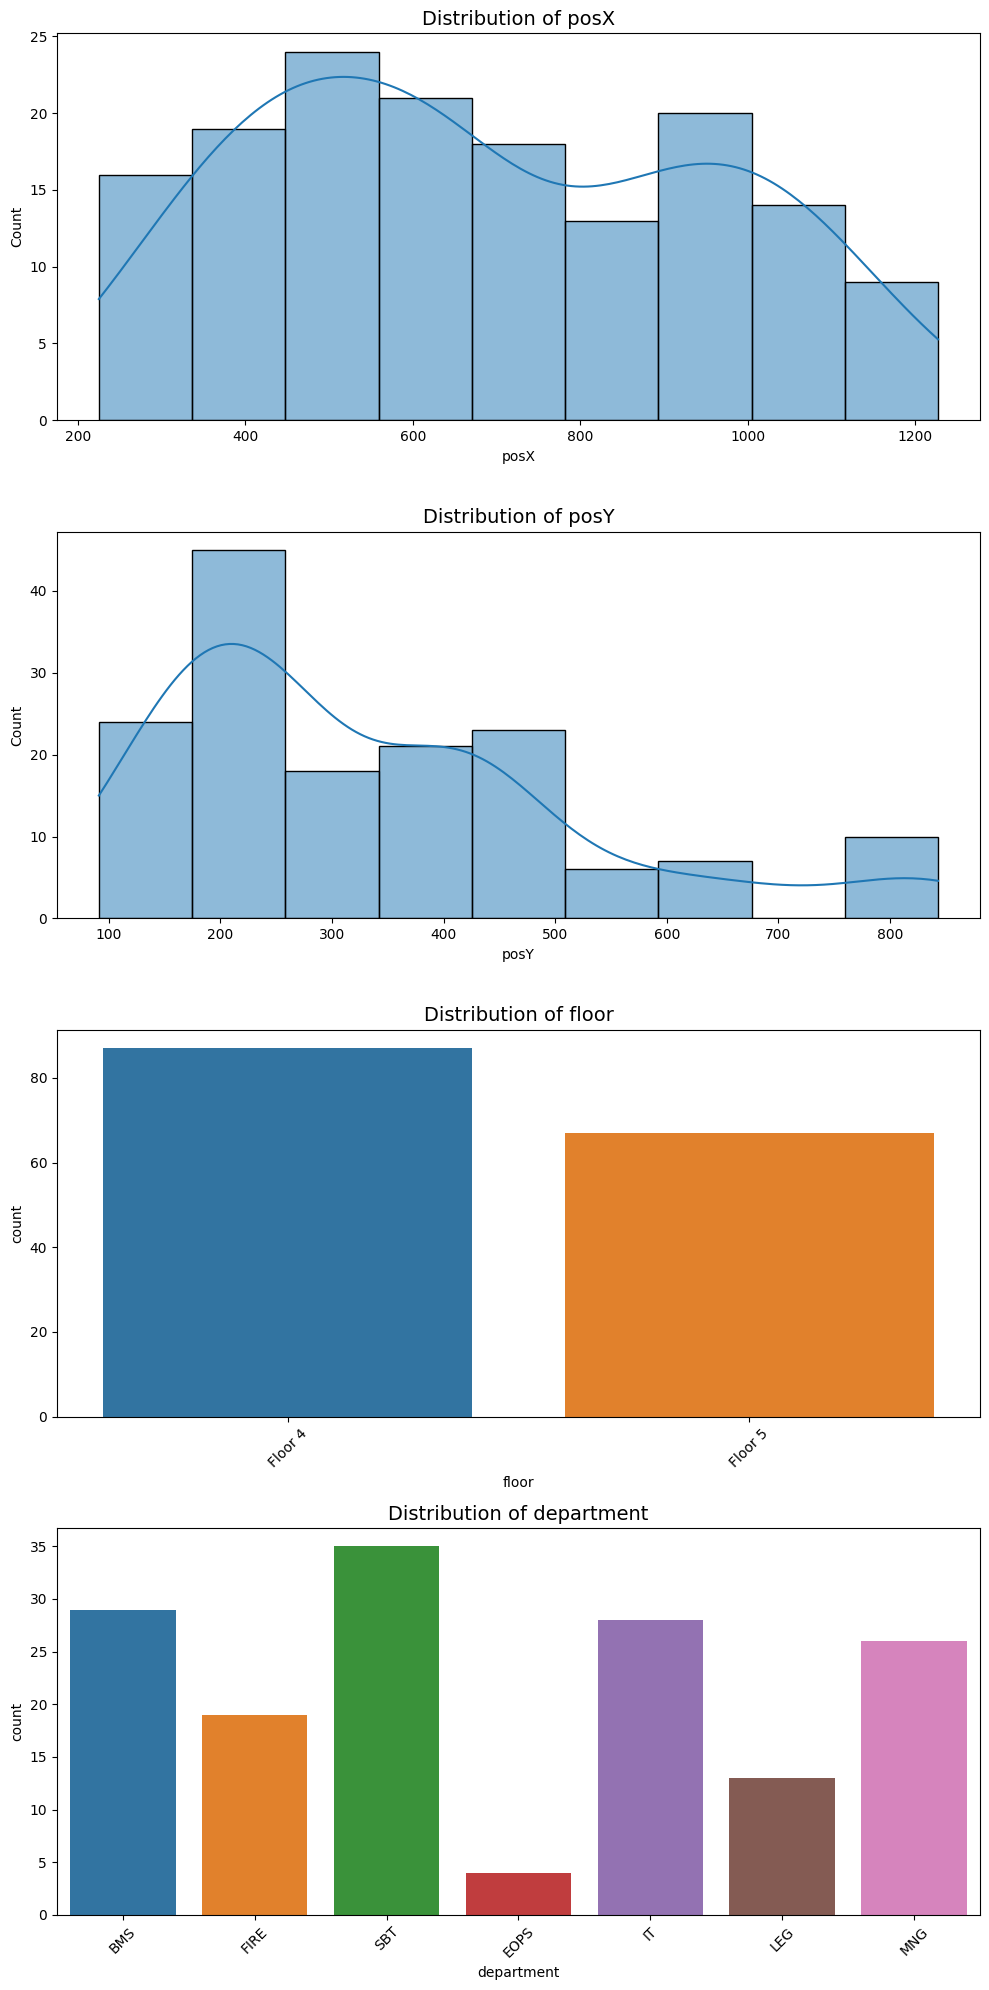

In [ ]:
# List of numerical columns (excluding ones without variability)
num_cols = ['posX', 'posY']

# List of categorical columns (excluding ones with too many unique values or only one unique value)
cat_cols = ['floor', 'department']

# Create subplots
fig, ax = plt.subplots(len(num_cols) + len(cat_cols), 1, figsize=(10, 20))

# Plot histograms for numerical columns
for i, col in enumerate(num_cols):
    sns.histplot(data[col], ax=ax[i], kde=True)
    ax[i].set_title(f'Distribution of {col}', fontsize=14)

# Plot bar plots for categorical columns
for i, col in enumerate(cat_cols):
    sns.countplot(x=data[col], ax=ax[i+len(num_cols)])
    ax[i+len(num_cols)].set_title(f'Distribution of {col}', fontsize=14)
    ax[i+len(num_cols)].tick_params(axis='x', rotation=45)

# Adjust the layout for better visibility
plt.tight_layout()

Based on the visualizations, here are the insights:

- `posX`: The distribution of X-coordinates for the sensors appears to be multi-modal, indicating the presence of multiple peaks. The highest concentration of sensors is observed around the 400-500 and 900-1000 range, suggesting clusters or specific areas where sensors are positioned.

- `posY`: The distribution of Y-coordinates for the sensors also exhibits a multi-modal pattern. The largest concentration of sensors is observed around the 150-200 and 400-450 range, indicating the presence of clusters or specific regions where sensors are located.

- `floor`: The majority of sensors are situated on 'Floor 4', indicating that this floor has the highest number of sensors compared to other floors.

- `department`: The sensors are distributed across 7 different departments. The 'SBT' department has the highest number of sensors, suggesting that it contains a significant portion of the sensors. On the other hand, the 'FRT' department has the fewest number of sensors.

These insights provide a better understanding of the distribution of values in each column and the relationships between different columns within the dataset.

# Investigation of Outliers and Inconsistencies

After our initial analysis, we have determined that there are **no missing values** in the dataset. To further investigate possible outliers and inconsistencies, we will focus on specific columns:

1. Columns with no variability: Since `timezoneOffset`, `height`, `width`, and `capacity` have no variability, there cannot be any outliers present in these columns.

2. Categorical columns: Outliers are not meaningful for categorical columns unless there are very infrequent categories that can be considered anomalies. We can check for inconsistencies by examining the unique values in each of these columns. However, we will skip the `sensorId` and `name` columns as every value is unique. Additionally, since the `workspace` column has only one unique value ('Desks'), we can skip this column as well.

3. Numerical columns with variability: To identify any outliers in the `posX` and `posY` columns, we can utilize box plots and scatter plots.

By focusing on these specific columns, we can thoroughly investigate the dataset for any potential outliers and inconsistencies.


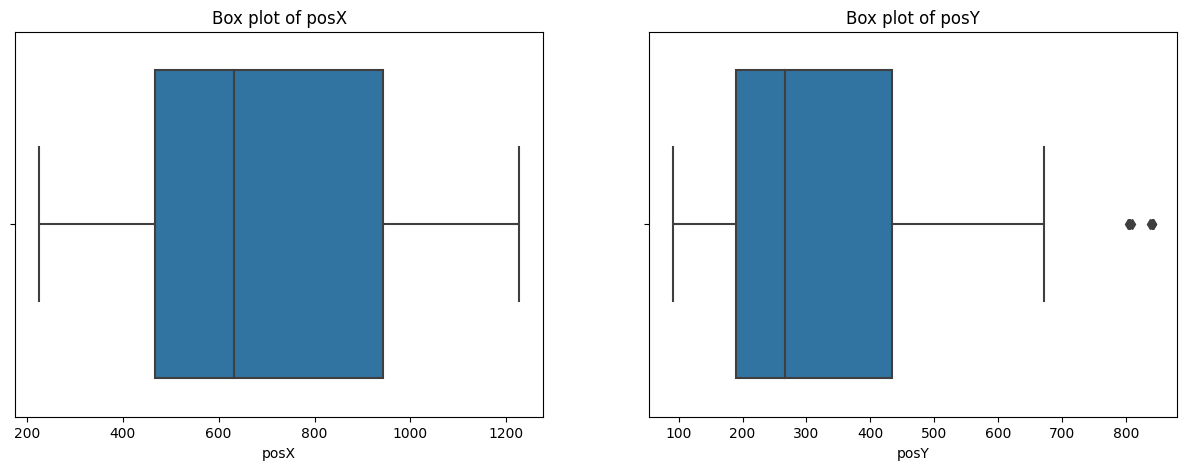

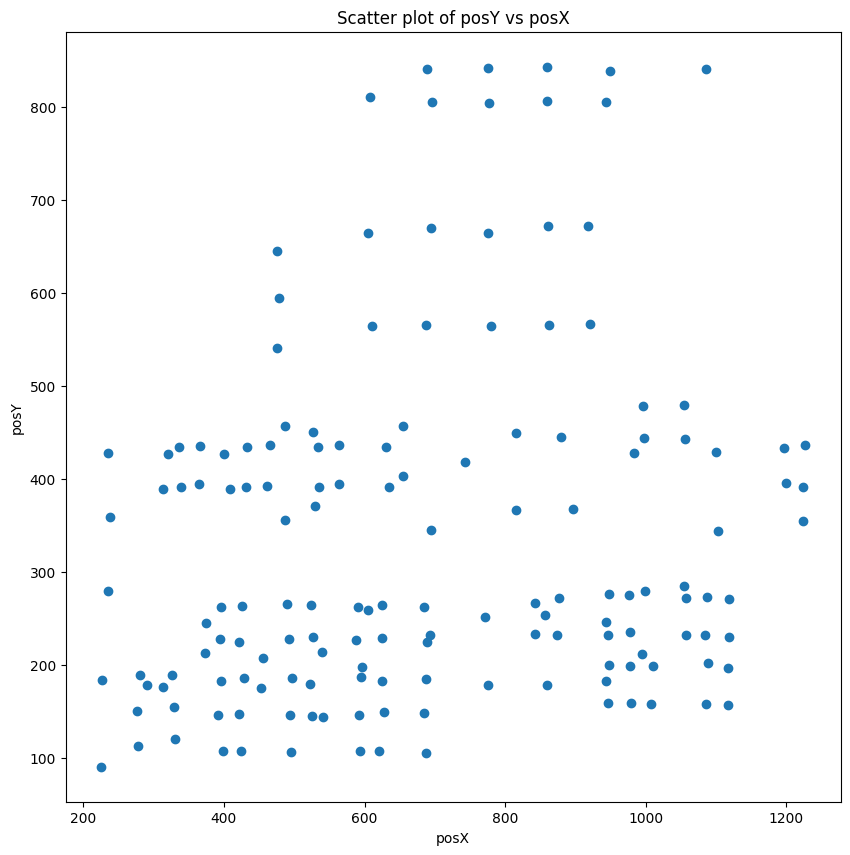

Unique values in floor: ['Floor 4' 'Floor 5']

Unique values in building: ['REM Tower1' 'REM Tower2' 'REM Tower3' 'REM Tower4' 'REM Tower5'
 'REM Tower6' 'REM Tower7' 'REM Tower8' 'REM Tower9' 'REM Tower10'
 'REM Tower11' 'REM Tower12' 'REM Tower13' 'REM Tower14' 'REM Tower15'
 'REM Tower16' 'REM Tower17' 'REM Tower18' 'REM Tower19' 'REM Tower20'
 'REM Tower21' 'REM Tower22' 'REM Tower23' 'REM Tower24' 'REM Tower25'
 'REM Tower26' 'REM Tower27' 'REM Tower28' 'REM Tower29' 'REM Tower30'
 'REM Tower31' 'REM Tower32' 'REM Tower33' 'REM Tower34' 'REM Tower35'
 'REM Tower36' 'REM Tower37' 'REM Tower38' 'REM Tower39' 'REM Tower40'
 'REM Tower41' 'REM Tower42' 'REM Tower43' 'REM Tower44' 'REM Tower45'
 'REM Tower46' 'REM Tower47' 'REM Tower48' 'REM Tower49' 'REM Tower50'
 'REM Tower51' 'REM Tower52' 'REM Tower53' 'REM Tower54' 'REM Tower55'
 'REM Tower56' 'REM Tower57' 'REM Tower58' 'REM Tower59' 'REM Tower60'
 'REM Tower61' 'REM Tower62' 'REM Tower63' 'REM Tower64' 'REM Tower65'
 'REM Tower6

In [ ]:
# Check for outliers in posX and posY using box plots and scatter plots

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Box plots
sns.boxplot(x=data['posX'], ax=ax[0])
ax[0].set_title('Box plot of posX')

sns.boxplot(x=data['posY'], ax=ax[1])
ax[1].set_title('Box plot of posY')


plt.show()

# Scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(data['posX'], data['posY'])
plt.xlabel('posX')
plt.ylabel('posY')
plt.title('Scatter plot of posY vs posX')
plt.show()

# Check for inconsistencies in the categorical columns by checking the unique values
cat_cols = ['floor', 'building', 'department']

for col in cat_cols:
    print(f'Unique values in {col}: {data[col].unique()}')
    print()



Based on the outlier and inconsistency checks, here are the insights:

1. `posX` and `posY`: The box plot for `posY` reveals that there are outliers in `posY`. Box plot for `posX` indicate that there are no apparent outliers.

2. `floor`: The unique values in the `floor` column are 'Floor 4' and 'Floor 5', which are consistent and aligned with the expected values for floor designation.

3. `building`: The unique values in the `building` column follow the pattern 'REM TowerX', where X represents a number from 1 to 154. This consistent pattern suggests that the data is structured and aligned with the expected naming convention.

4. `department`: The unique values in the `department` column include 'BMS', 'FIRE', 'SBT', 'EOPS', 'IT', 'LEG', and 'MNG'. These values seem consistent and represent different departments within the dataset.


In [ ]:
# Count the number of sensors on each floor
sensor_counts = data['floor'].value_counts()
sensor_counts


Floor 4    87
Floor 5    67
Name: floor, dtype: int64

In [ ]:
# Count the number of sensors in each building
building_counts = data['building'].value_counts()

# Display the sensor distribution in each building
building_counts


REM Tower1      1
REM Tower106    1
REM Tower99     1
REM Tower100    1
REM Tower101    1
               ..
REM Tower53     1
REM Tower54     1
REM Tower55     1
REM Tower56     1
REM Tower154    1
Name: building, Length: 154, dtype: int64

Insights from the data:

Each building in the dataset has exactly one sensor. This is consistent across all 154 buildings ('REM Tower1' through 'REM Tower154').


#**Patterns**

Based on the patterns observed in the dataset, here are the key insights:

1. Sensor locations (`posX` and `posY`) exhibit multi-modal distributions, indicating that the sensors are clustered in specific areas rather than being evenly spread out. This suggests that certain regions or zones within the monitored area might have higher sensor density or importance.

2. The majority of sensors are situated on the 4th floor, indicating a higher concentration of sensors on this floor compared to other floors. This could be due to specific requirements or activities occurring on that floor.

3. Sensors are evenly distributed across buildings, with each building housing exactly one sensor. This implies that each building is equipped with its own dedicated sensor, possibly for monitoring specific conditions or parameters related to that particular building.

4. There is an uneven distribution of sensors across departments, with the 'SBT' department having the highest number of sensors and the 'FRT' department having the fewest. This discrepancy in sensor allocation among departments suggests varying levels of monitoring needs or priorities across different departments.

These patterns provide valuable insights into the distribution and allocation of sensors within the dataset.

In [ ]:
# Perform correlation analysis on numerical variables
correlation_matrix = data[num_cols].corr()

# Display the correlation matrix
correlation_matrix




,posX,posY
posX,1.000000,0.178883
posY,0.178883,1.000000




Insights:

*   The correlation matrix indicates that there is a weak positive correlation (approximately 0.179) between the `posX` and `posY` variables.
*  This suggests that there isn't a strong linear relationship between the X and Y coordinates of the sensors.





In [ ]:
# Calculate the average posX and posY for each floor
average_pos_floor = data.groupby('floor')[num_cols].mean()

# Calculate the average posX and posY for each department
average_pos_department = data.groupby('department')[num_cols].mean()

average_pos_floor, average_pos_department


(               posX        posY
 floor                          
 Floor 4  700.080460  256.390805
 Floor 5  668.462687  441.214926,
                    posX        posY
 department                         
 BMS          752.965517  281.655172
 EOPS        1026.000000  461.250000
 FIRE         968.526315  310.210526
 IT           532.035714  444.592857
 LEG          598.153846  485.846154
 MNG          850.538462  415.261539
 SBT          473.285714  182.828571)



By analyzing the data, the following insights can be observed:

## By floor:

- **Floor 4:** The average `posX` is approximately 700.08, and the average `posY` is approximately 256.39.
- **Floor 5:** The average `posX` is approximately 668.46, and the average `posY` is approximately 441.21.

These results indicate that there are systematic variations in sensor locations across different floors. Specifically, sensors on Floor 5 tend to have higher average Y-coordinates compared to sensors on Floor 4. This suggests that the sensors on Floor 5 might be located at a higher position within the building.

## By department:

- **BMS:** The average `posX` is approximately 752.97, and the average `posY` is approximately 281.66.
- **EOPS:** The average `posX` is approximately 1026.00, and the average `posY` is approximately 461.25.
- **FIRE:** The average `posX` is approximately 968.53, and the average `posY` is approximately 310.21.
- **IT:** The average `posX` is approximately 532.04, and the average `posY` is approximately 444.59.
- **LEG:** The average `posX` is approximately 598.15, and the average `posY` is approximately 485.85.
- **MNG:** The average `posX` is approximately 850.54, and the average `posY` is approximately 415.26.
- **SBT:** The average `posX` is approximately 473.29, and the average `posY` is approximately 182.83.

These findings indicate that sensor locations also vary systematically across different departments. For instance, the EOPS department has the highest average `posX`, suggesting that it might be situated towards the right side of the building layout. Additionally, there are variations in both `posX` and `posY` among the departments, reflecting different spatial arrangements or departmental requirements within the monitored area.

These insights highlight the systematic differences in sensor locations based on floor and department, providing valuable information about the distribution and organization of sensors within the building.
